# Astronomy 119 Final Project (#3)
## Astronomical Source Detection
### Fall 2018, 11:40am Section, Brant Robertson

### Authored by:
Laura Daniels (ladaniel@ucsc.edu)

Jennifer Bravo (jebravo@ucsc.edu)

Natalie Saechao (namsaech@ucsc.edu)

Simon Bukin (sbukin@ucsc.edu)


# Importing modules
In the following cells, we import the necessary modules for astronomical source detection.

In [4]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

# Reading and displaying FITS Image
In this section, we read in the example FITS image and display it using matplotlib.

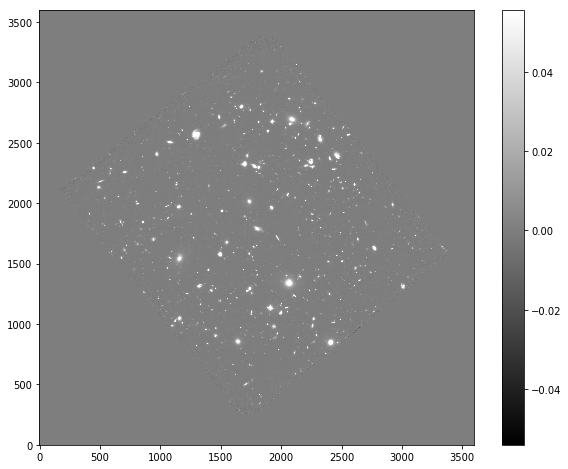

In [5]:
# open the data from the FITS image (this is a numpy array)
data = fits.open('image-2.fits')[0].data

# calculating mean and standard deviation
m, s = np.mean(data), np.std(data)
# displaying the image itself
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
# make sure to plot colorbar
plt.colorbar()

# Background Subtraction
These cells deal with background subtraction of our initial image.

In [6]:
# measure the background (varying) of the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


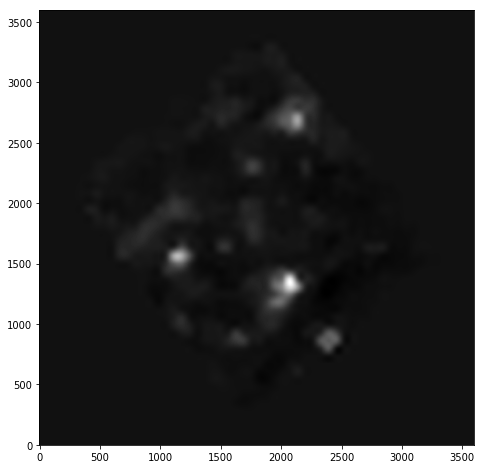

In [7]:
bkg_image = bkg.back()
# print the background subtracted image
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')

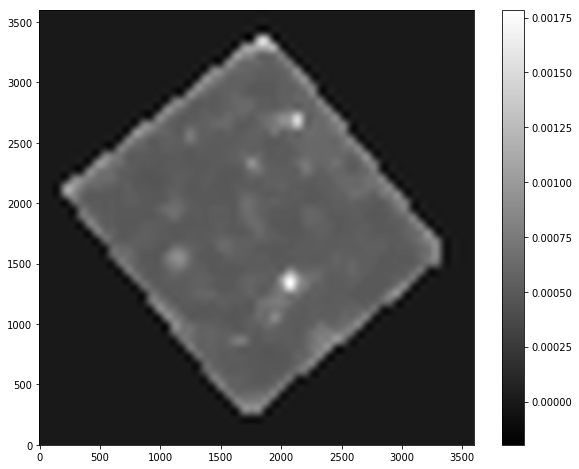

In [8]:
# calculate background noise as a 2d array
bkg_rms = bkg.rms()
# display the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
# don't forget the colorbar
plt.colorbar()

In [9]:
# data_sub is the initial data minus the background noise
data_sub = data - bkg

# Detecting Objects
Here, we detect the objects in our initial tests image using data_sub alongside SEP's extract function.

In [10]:
# use the SEP extract function to get all the detected opjects
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
# print out how many opjects were found
len(objects)

8644

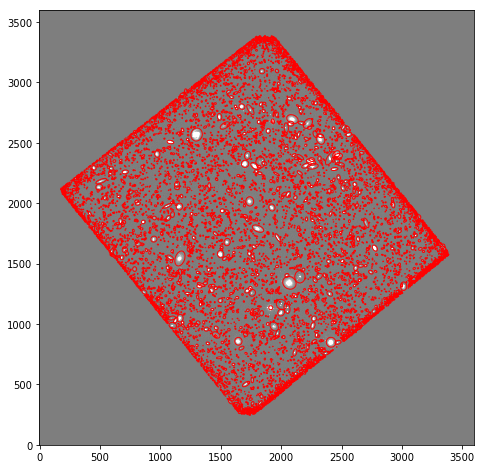

In [11]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
# caculate mean and standard deviation of subtracted data
m, s = np.mean(data_sub), np.std(data_sub)
# display the subtracted data
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# display each ellipse
for i in range(len(objects)):
    # new Ellipse crated for each object detected
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180 / np.pi)
    # no fill color
    e.set_facecolor('none')
    # red edge color
    e.set_edgecolor('red')
    ax.add_artist(e)

In [12]:
#all fields available for each object
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

# Calculating Flux per Object
These cells deal with calculating the flux and fluxerr for every option.

In [13]:
import matplotlib.pyplot as plt
# calculating the flux, fluxerr, and flag for each object
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)


In [14]:
# first 10 results
for i in range(10):
    print('object: {:d}: flux= {:f} +/-{:f}'.format(i, flux[i], fluxerr[i]))  


object: 0: flux= 0.031282 +/-0.176890
object: 1: flux= 0.031018 +/-0.176142
object: 2: flux= -0.024388 +/-0.002883
object: 3: flux= 0.001947 +/-0.044219
object: 4: flux= 0.012457 +/-0.111649
object: 5: flux= -0.011228 +/-0.002875
object: 6: flux= 0.029368 +/-0.171394
object: 7: flux= -0.009126 +/-0.002875
object: 8: flux= 0.048023 +/-0.219161
object: 9: flux= 0.027840 +/-0.166877


(array([103.,  61.,  34.,  15.,  13.,  11.,   8.,   6.,   3.,   4.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.]),
 array([ 1.06136543,  1.85075177,  2.64013812,  3.42952447,  4.21891081,
         5.00829716,  5.7976835 ,  6.58706985,  7.37645619,  8.16584254,
         8.95522889,  9.74461523, 10.53400158, 11.32338792, 12.11277427,
        12.90216061, 13.69154696, 14.48093331, 15.27031965, 16.059706  ,
        16.84909234, 17.63

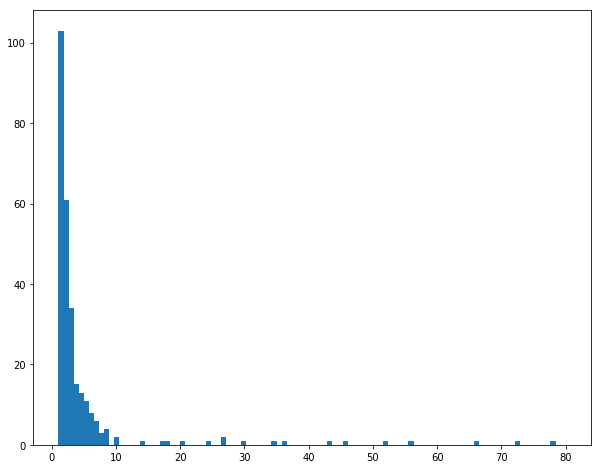

In [35]:
plt.hist(flux, bins=100, range=(-min(flux), 80)) #makes a histogram

In [34]:
flux[np.array(flux) > 10]

array([ 72.33984954,  65.90718431, 807.29728357,  52.12667887,
        45.75134319,  77.97422259,  55.99823848,  24.459865  ,
        20.61670998,  10.23188425,  35.85189164,  27.04002014,
        17.8124207 ,  34.96199449,  13.93424859,  30.02416534,
        26.54259004, 214.1414423 ,  43.59707836,  17.12729268,
        80.55767716])